<a href="https://colab.research.google.com/github/Fumanguyen/machine-learning-advertising/blob/master/Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My Initial Thoughts

1, This dataset is created based on random method so there might be no significant result

2, This analysis's purpose is to help a digital marketer to optimize the ads, I will prefer to use the models that allow me to intepret the results and the marketer can base on the result to learn about customer insights or replicate the success to other campaigns as well.
The models I choose are association rule (unsupervised learning technique), logistic regression and tree-based model

3, There is likely to be a trade-off between intepretability and accuracy of the models here





In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
import random as random
import datetime as dt

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import and Manipulate Data

The dataset is downloaded from Kaggle: https://www.kaggle.com/fayomi/advertising
This dataset will be manipulated so that it's suitable for this analysis:
- Assume that this dataset is about our website visitors. I am going to add visitor ID to each row
- I will randomly create 2 more attributes indicating the advertising: landing pages and ad copy. Assume that we use 4 landing pages and 3 ad copies for this dataset. 
- Regarding the conversion, I assume that the conversion rate is around 20%, so I randomly create this data and make sure that the conversion rate level is maintained
- Remove inappropriate attributes such as "Click on ad", "Ad topic line"

In [0]:
#Upload advertising data
from google.colab import files
uploaded = files.upload()

Saving advertising.csv to advertising.csv


In [0]:
#Country and Region
from google.colab import files
uploaded = files.upload()

Saving countries of the world.csv to countries of the world.csv


In [0]:
advertising = pd.read_csv('advertising.csv')
advertising.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Landing Page,Ad Copy,Conversion
0,65.40,33,66699.12,247.31,Adaptive 24hour Graphic Interface,Sylviaview,0,Palau,2/12/16 22:51,0,Lp1,Ad1,0.0
1,73.30,36,68211.35,135.72,Adaptive asynchronous attitude,West Tanya,1,Hungary,1/30/16 4:38,1,Lp2,Ad2,1.0
2,44.57,31,38349.78,133.17,Adaptive context-sensitive application,Joneston,1,China,3/27/16 9:11,1,Lp3,Ad3,NaN
3,62.06,44,44174.25,105.00,Adaptive contextually-based methodology,Port Paultown,0,Austria,4/12/16 14:01,1,NaN,NaN,NaN
4,63.80,38,36037.33,108.70,Adaptive demand-driven knowledgebase,Colebury,1,Tuvalu,3/19/16 0:27,1,NaN,NaN,NaN


In [0]:
#Randomly create Ad copy and landing page attribute
ad_copy = ["ad1","ad2","ad3"]
landing_page = ["lp1","lp2","lp3","lp4"]
random.seed(10)
advertising["Ad Copy"] = random.choices(ad_copy, k = 1000)
advertising["Landing Page"] = random.choices(landing_page, k=1000)

#Create conversion (label) data
conversion_arr = np.zeros((1000,1)).astype("int32")
random.seed(11)
random_conversion = []
for i in range(200):
    random_conversion.append(random.randint(0,999))
for i in random_conversion:
    conversion_arr[i,0] = 1
advertising['Conversion'] = conversion_arr

In [0]:
#Dropping City and Ad Topic Line, adding Visitor ID
advertising = advertising.drop(axis =1, columns = ["Clicked on Ad", "Ad Topic Line"])
advertising['Visitor ID'] = range(0,1000)

In [0]:
#Turn country into region data
region = pd.read_csv('countries of the world.csv', usecols = [0,1])

#trimming the whitespace on the right of the strings
i = 0
while i < len(region):
    region.iloc[i]['Country'] = region.iloc[i]['Country'].rstrip()
    region.iloc[i]['Region'] = region.iloc[i]['Region'].rstrip()
    i +=1
    
#Merging advertising data and region data
advertising = pd.merge(advertising, region, how = "left", left_on = "Country", right_on = "Country")
advertising.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country,Timestamp,Landing Page,Ad Copy,Conversion,Visitor ID,Region
0,65.40,33,66699.12,247.31,Sylviaview,0,Palau,2/12/16 22:51,lp1,ad2,1,0,OCEANIA
1,73.30,36,68211.35,135.72,West Tanya,1,Hungary,1/30/16 4:38,lp3,ad2,0,1,EASTERN EUROPE
2,44.57,31,38349.78,133.17,Joneston,1,China,3/27/16 9:11,lp4,ad2,0,2,ASIA (EX. NEAR EAST)
3,62.06,44,44174.25,105.00,Port Paultown,0,Austria,4/12/16 14:01,lp1,ad1,0,3,WESTERN EUROPE
4,63.80,38,36037.33,108.70,Colebury,1,Tuvalu,3/19/16 0:27,lp3,ad3,1,4,OCEANIA


#Exploratory Data Analysis

The dataset contains 1000 observations, with 183 are converted and 817 are non-converted. Average conversion rate is 18.3%


---


In [0]:
#Summary the data
advertising.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Conversion,Visitor ID
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.18300,499.500000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.38686,288.819436
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000,0.000000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000,249.750000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.00000,499.500000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,0.00000,749.250000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000,999.000000


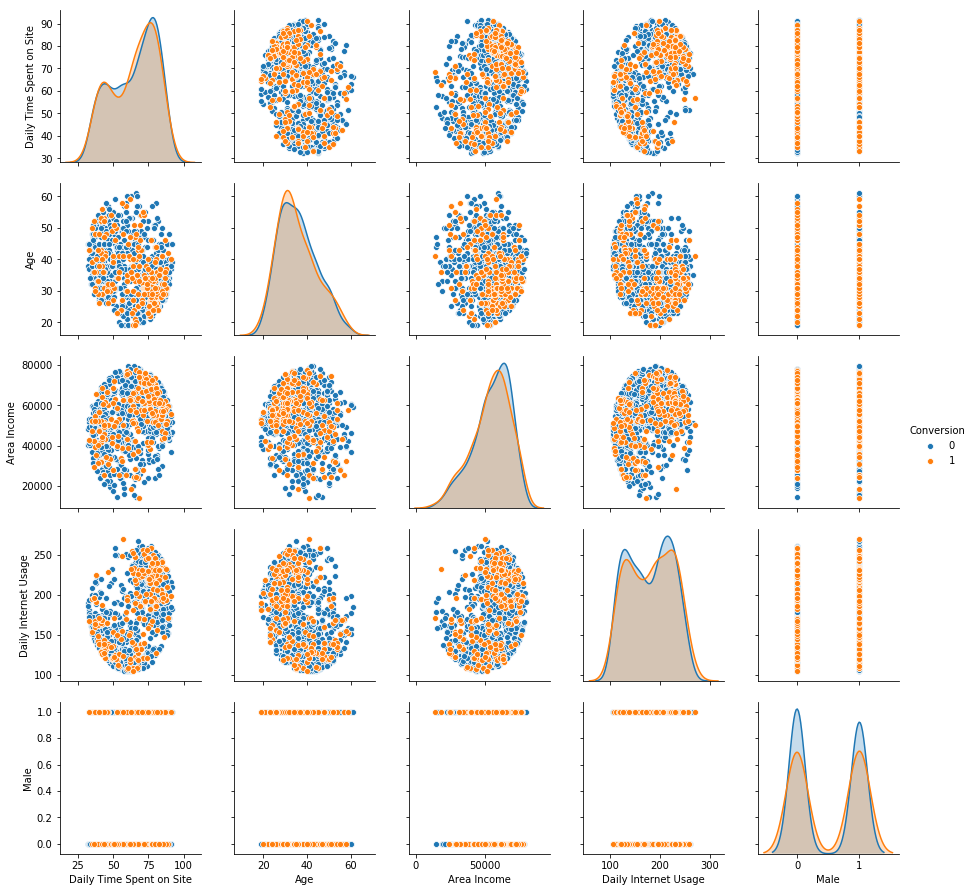

In [0]:
# Quick overview of the relationship between the features
snb.pairplot(advertising, vars = ["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage", "Male"],hue = "Conversion")

In the following part, we will explore how the conversion rate is differed across different values of the features. This can give us a hint of which feature might be more significant than others in driving conversion

---


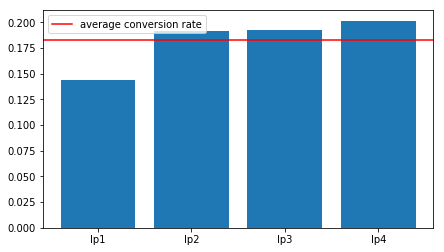

In [0]:
#Conversion rate by landing page
landing_page = advertising.groupby("Landing Page").agg({"Visitor ID":"count","Conversion":"sum"})
landing_page["Conversion Rate"] = landing_page["Conversion"]/landing_page["Visitor ID"]
plt.figure(figsize = (7,4))
plt.bar(landing_page.index, landing_page['Conversion Rate'])
plt.axhline(y = 0.183, color = "red", label  = "average conversion rate")
plt.legend()

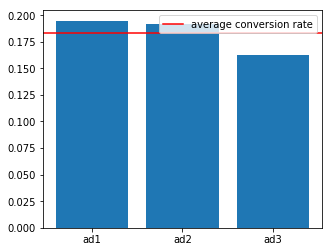

In [0]:
#Conversion rate by ad copy
ad_copy = advertising.groupby("Ad Copy").agg({"Visitor ID":"count","Conversion":"sum"})
ad_copy["Conversion Rate"] = ad_copy["Conversion"]/ad_copy["Visitor ID"]
plt.figure(figsize = (5,4))
plt.bar(ad_copy.index, ad_copy['Conversion Rate'])
plt.axhline(y = 0.183, color = "red", label  = "average conversion rate")
plt.legend()

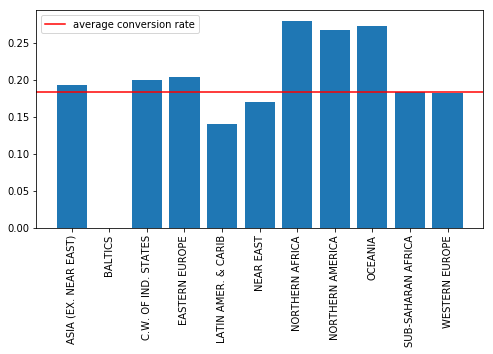

In [0]:
#geography
geo_conversion = advertising.groupby('Region').agg({'Visitor ID':"count", "Conversion":"sum"})
geo_conversion['Conversion Rate'] = geo_conversion['Conversion']/geo_conversion['Visitor ID']
plt.figure(figsize = (8,4))
plt.bar(geo_conversion.index, geo_conversion['Conversion Rate'])
plt.axhline(y = 0.183, color = "red", label  = "average conversion rate")
plt.xticks(rotation = 90)
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  """


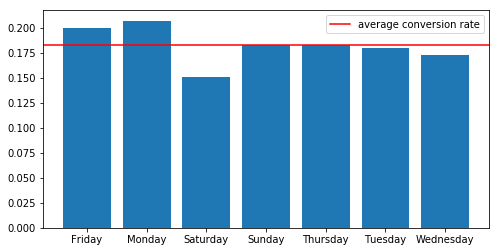

In [0]:
#Weekday
advertising['Timestamp'] = pd.to_datetime(advertising['Timestamp'])
i = 0
weekday_list = []
while i < len(advertising):
    weekday_list.append(advertising.iloc[i]['Timestamp'].weekday_name)
    i += 1
advertising['Weekday'] = weekday_list
weekday = advertising.groupby('Weekday').agg({'Visitor ID': "count","Conversion":"sum"})
weekday['Conversion Rate'] = weekday['Conversion']/weekday['Visitor ID']
plt.figure(figsize = (8,4))
plt.bar(weekday.index, weekday['Conversion Rate'])
plt.axhline(y = 0.183, color = "red", label  = "average conversion rate")
#plt.xticks(rotation = 90)
plt.legend()

Text(0.5, 1.0, 'Histogram of Age')

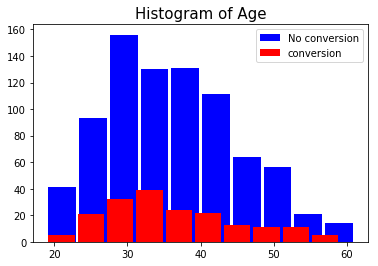

In [0]:
converted = advertising[advertising["Conversion"] == 1]
no_convert = advertising[advertising["Conversion"] == 0]

#age
f, ax = plt.subplots()   #(1, 2, sharey=True)
ax.hist(no_convert['Age'], bins = 10, rwidth = 0.9, color = "blue", label = "No conversion")
ax.hist(converted['Age'], bins = 10, rwidth = 0.9, color = "red", label = "conversion")
ax.legend()
ax.set_title("Histogram of Age", size  =15)
#ax1.set_title("Converted")
#ax2.hist(no_convert['Age'], bins = 10, rwidth = 0.9)
#ax2.set_title("Non-converted")

Text(0.5, 1.0, 'Histogram of Income')

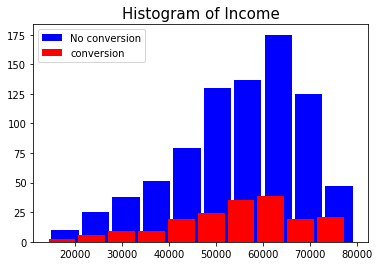

In [0]:
#Area Income
f, ax = plt.subplots()   #(1, 2, sharey=True)
ax.hist(no_convert['Area Income'], bins = 10, rwidth = 0.9, color = "blue", label = "No conversion")
ax.hist(converted['Area Income'], bins = 10, rwidth = 0.9, color = "red", label = "conversion")
ax.legend()
ax.set_title("Histogram of Income", size = 15)

Text(0.5, 1.0, 'Histogram of Daily Time Spent on Site')

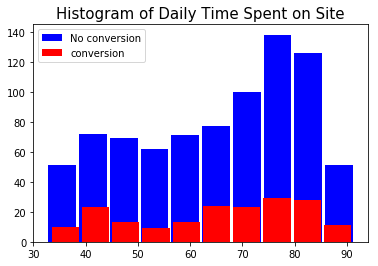

In [0]:
#Daily time spent on site
f, ax = plt.subplots()   #(1, 2, sharey=True)
ax.hist(no_convert['Daily Time Spent on Site'], bins = 10, rwidth = 0.9, color = "blue", label = "No conversion")
ax.hist(converted['Daily Time Spent on Site'], bins = 10, rwidth = 0.9, color = "red", label = "conversion")
ax.legend()
ax.set_title("Histogram of Daily Time Spent on Site", size = 15)

Text(0.5, 1.0, 'Histogram of Daily Internet Usage')

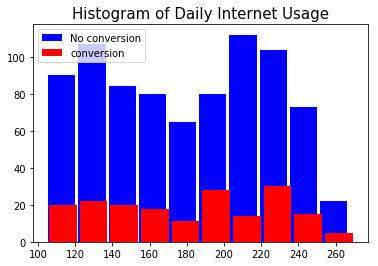

In [0]:
#Daily Internet Usage
f, ax = plt.subplots()   #(1, 2, sharey=True)
ax.hist(no_convert['Daily Internet Usage'], bins = 10, rwidth = 0.9, color = "blue", label = "No conversion")
ax.hist(converted['Daily Internet Usage'], bins = 10, rwidth = 0.9, color = "red", label = "conversion")
ax.legend()
ax.set_title("Histogram of Daily Internet Usage", size = 15)

In [0]:
#Gender and Conversion
male = advertising.groupby("Male").agg({"Visitor ID": "count", "Conversion":"sum"})
male['Conversion Rate'] = male['Conversion']/male['Visitor ID']
male

,Visitor ID,Conversion,Conversion Rate
Male,,,
0,519,91,0.175337
1,481,92,0.191268


To summarize:
- Except for lp1, other landing pages have the conversion rate higher than the average conversion rate
- Except for ad3, other ad copies have the conversion rate higher than the avg. converion rate
- Northern Africa, Northern America and Oceania have significantly higher conversion rate than other regions
- Friday and Monday have higher conversion rates than other days of week.
- Male has higer conversion rate than female
- For numeric features, there is no clear pattern of how they affect the conversion

# Data Preparation

In [0]:
advertising_model = advertising.drop(axis = 1, columns = ['City', "Country", "Timestamp","Visitor ID"])
advertising_model.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Landing Page,Ad Copy,Conversion,Region,Weekday
0,65.40,33,66699.12,247.31,0,lp1,ad2,1,OCEANIA,Friday
1,73.30,36,68211.35,135.72,1,lp3,ad2,0,EASTERN EUROPE,Saturday
2,44.57,31,38349.78,133.17,1,lp4,ad2,0,ASIA (EX. NEAR EAST),Sunday
3,62.06,44,44174.25,105.00,0,lp1,ad1,0,WESTERN EUROPE,Tuesday
4,63.80,38,36037.33,108.70,1,lp3,ad3,1,OCEANIA,Saturday


In [0]:
#Create dummy variables for Region
region_dummy = pd.get_dummies(advertising_model['Region']) #.drop(axis =1, columns = ['OCEANIA'])
advertising_model = pd.merge(advertising_model, region_dummy, how = "left", left_index = True, right_index = True).drop(axis = 1, columns = ["Region"])
advertising_model.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Landing Page,Ad Copy,Conversion,Weekday,ASIA (EX. NEAR EAST),BALTICS,C.W. OF IND. STATES,EASTERN EUROPE,LATIN AMER. & CARIB,NEAR EAST,NORTHERN AFRICA,NORTHERN AMERICA,OCEANIA,SUB-SAHARAN AFRICA,WESTERN EUROPE
0,65.40,33,66699.12,247.31,0,lp1,ad2,1,Friday,0,0,0,0,0,0,0,0,1,0,0
1,73.30,36,68211.35,135.72,1,lp3,ad2,0,Saturday,0,0,0,1,0,0,0,0,0,0,0
2,44.57,31,38349.78,133.17,1,lp4,ad2,0,Sunday,1,0,0,0,0,0,0,0,0,0,0
3,62.06,44,44174.25,105.00,0,lp1,ad1,0,Tuesday,0,0,0,0,0,0,0,0,0,0,1
4,63.80,38,36037.33,108.70,1,lp3,ad3,1,Saturday,0,0,0,0,0,0,0,0,1,0,0


In [0]:
#Create dummy variables for ad copy
ad_dummy = pd.get_dummies(advertising_model['Ad Copy']) #.drop(axis = 1, columns = ['ad1'])
advertising_model = pd.merge(advertising_model, ad_dummy, how = "left", left_index = True, right_index = True).drop(axis =1, columns = ['Ad Copy'])
advertising_model.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Landing Page,Conversion,Weekday,ASIA (EX. NEAR EAST),BALTICS,C.W. OF IND. STATES,EASTERN EUROPE,LATIN AMER. & CARIB,NEAR EAST,NORTHERN AFRICA,NORTHERN AMERICA,OCEANIA,SUB-SAHARAN AFRICA,WESTERN EUROPE,ad1,ad2,ad3
0,65.40,33,66699.12,247.31,0,lp1,1,Friday,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,73.30,36,68211.35,135.72,1,lp3,0,Saturday,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,44.57,31,38349.78,133.17,1,lp4,0,Sunday,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,62.06,44,44174.25,105.00,0,lp1,0,Tuesday,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,63.80,38,36037.33,108.70,1,lp3,1,Saturday,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [0]:
#Create dummy variables for landing page
lp_dummy = pd.get_dummies(advertising_model['Landing Page']) #.drop(axis =1, columns = ['lp1'])
advertising_model = pd.merge(advertising_model, lp_dummy, how = "left", left_index = True, right_index = True).drop(axis = 1, columns = ["Landing Page"])
advertising_model.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Conversion,Weekday,ASIA (EX. NEAR EAST),BALTICS,C.W. OF IND. STATES,EASTERN EUROPE,LATIN AMER. & CARIB,NEAR EAST,NORTHERN AFRICA,NORTHERN AMERICA,OCEANIA,SUB-SAHARAN AFRICA,WESTERN EUROPE,ad1,ad2,ad3,lp1,lp2,lp3,lp4
0,65.40,33,66699.12,247.31,0,1,Friday,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
1,73.30,36,68211.35,135.72,1,0,Saturday,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,44.57,31,38349.78,133.17,1,0,Sunday,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,62.06,44,44174.25,105.00,0,0,Tuesday,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
4,63.80,38,36037.33,108.70,1,1,Saturday,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [0]:
#Create dummy variables for week days
weekday_dummy = pd.get_dummies(advertising_model['Weekday']) #.drop(axis =1, columns = ["Sunday"])
advertising_model = pd.merge(advertising_model, weekday_dummy, how ="left", left_index = True, right_index = True).drop(axis =1, columns = ['Weekday'])
advertising_model.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Conversion,ASIA (EX. NEAR EAST),BALTICS,C.W. OF IND. STATES,EASTERN EUROPE,LATIN AMER. & CARIB,NEAR EAST,NORTHERN AFRICA,NORTHERN AMERICA,OCEANIA,SUB-SAHARAN AFRICA,WESTERN EUROPE,ad1,ad2,ad3,lp1,lp2,lp3,lp4,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,65.40,33,66699.12,247.31,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
1,73.30,36,68211.35,135.72,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
2,44.57,31,38349.78,133.17,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,62.06,44,44174.25,105.00,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0
4,63.80,38,36037.33,108.70,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0


In [0]:
label = advertising_model['Conversion']
feature = advertising_model.drop(axis = 1, columns = ['Conversion', "OCEANIA", "ad1", "lp1", "Sunday"])

# Model Building

## Association Rules 

In [0]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [0]:
#Turn continuous features into nominal features
#Age 

age_group = []
for i in advertising['Age']:
    if i < 24 or i == 24:
        age_group.append('Age <= 24')
    elif 24 < i and i < 35:
        age_group.append("Age 25-34")
    elif (i > 35 or i == 35) and (i < 45):
        age_group.append("Age 35-44")
    else:
        age_group.append("Age > 44")
advertising_model['Age Group'] = age_group

#Create dummy variables from age groups:
age_group_dummy = pd.get_dummies(advertising_model['Age Group']) #.drop(axis =1, columns = ["Sunday"])
advertising_model = pd.merge(advertising_model, age_group_dummy, how ="left", left_index = True, right_index = True).drop(axis =1, columns = ['Age Group'])
advertising_model.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Conversion,ASIA (EX. NEAR EAST),BALTICS,C.W. OF IND. STATES,EASTERN EUROPE,LATIN AMER. & CARIB,NEAR EAST,NORTHERN AFRICA,NORTHERN AMERICA,OCEANIA,SUB-SAHARAN AFRICA,WESTERN EUROPE,ad1,ad2,ad3,lp1,lp2,lp3,lp4,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Age 25-34,Age 35-44,Age <= 24,Age > 44
0,65.40,33,66699.12,247.31,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,73.30,36,68211.35,135.72,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
2,44.57,31,38349.78,133.17,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,62.06,44,44174.25,105.00,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,63.80,38,36037.33,108.70,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0


In [0]:
#Income
income_level = []
for i in advertising_model['Area Income']:
    if i < 45000:
        income_level.append("Low Income")
    elif 44999 < i and i < 60000:
        income_level.append("Middle Income")
    else:
        income_level.append("High Income")
advertising_model['Income Level'] = income_level

#Create dummy variables from Income Level:
income_dummy = pd.get_dummies(advertising_model['Income Level'])
advertising_model = pd.merge(advertising_model, income_dummy, how ="left", left_index = True, right_index = True).drop(axis =1, columns = ['Income Level'])
advertising_model.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Conversion,ASIA (EX. NEAR EAST),BALTICS,C.W. OF IND. STATES,EASTERN EUROPE,LATIN AMER. & CARIB,NEAR EAST,NORTHERN AFRICA,NORTHERN AMERICA,OCEANIA,SUB-SAHARAN AFRICA,WESTERN EUROPE,ad1,ad2,ad3,lp1,lp2,lp3,lp4,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Age 25-34,Age 35-44,Age <= 24,Age > 44,High Income,Low Income,Middle Income
0,65.40,33,66699.12,247.31,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
1,73.30,36,68211.35,135.72,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,44.57,31,38349.78,133.17,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
3,62.06,44,44174.25,105.00,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,63.80,38,36037.33,108.70,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0


In [0]:
#Create the rules
advertising_rules = advertising_model.drop(axis = 1, columns = ['Daily Time Spent on Site','Age',
                                                      'Area Income','Daily Internet Usage'])
frequent_itemsets = apriori(advertising_rules,min_support = 0.03, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Male),(Conversion),0.481,0.183,0.092,0.191268,1.045181,0.003977,1.010224
1,(Conversion),(Male),0.183,0.481,0.092,0.502732,1.045181,0.003977,1.043703
2,(Male),(LATIN AMER. & CARIB),0.481,0.179,0.095,0.197505,1.103381,0.008901,1.023060
3,(LATIN AMER. & CARIB),(Male),0.179,0.481,0.095,0.530726,1.103381,0.008901,1.105964
4,(Male),(WESTERN EUROPE),0.481,0.121,0.061,0.126819,1.048092,0.002799,1.006664


In [0]:
#Filter the rules that contain "Conversion" only
consequents = []
for i in rules['consequents']:
    consequents.append(next(iter(i)))
rules['consequents_2'] = consequents
rules[rules['consequents_2'] == "Conversion"]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,consequents_2
0,(Male),(Conversion),0.481,0.183,0.092,0.191268,1.045181,0.003977,1.010224,Conversion
25,(ad1),(Conversion),0.308,0.183,0.060,0.194805,1.064509,0.003636,1.014661,Conversion
26,(ad2),(Conversion),0.366,0.183,0.070,0.191257,1.045119,0.003022,1.010209,Conversion
28,(lp2),(Conversion),0.271,0.183,0.052,0.191882,1.048535,0.002407,1.010991,Conversion
30,(lp3),(Conversion),0.234,0.183,0.045,0.192308,1.050862,0.002178,1.011524,Conversion
32,(lp4),(Conversion),0.258,0.183,0.052,0.201550,1.101368,0.004786,1.023233,Conversion
34,(Friday),(Conversion),0.155,0.183,0.031,0.200000,1.092896,0.002635,1.021250,Conversion
36,(Age 25-34),(Conversion),0.412,0.183,0.083,0.201456,1.100854,0.007604,1.023112,Conversion
39,(Low Income),(Conversion),0.217,0.183,0.045,0.207373,1.133187,0.005289,1.030750,Conversion
235,"(Male, ad1)",(Conversion),0.153,0.183,0.032,0.209150,1.142898,0.004001,1.033066,Conversion


- If visitor is a Male, there is 4.5% higher chance that the visitor will convert
- If the ad copy is ad1, there is 6.5% higher chance that the visitor will convert
- If the ad copy is ad2, there is 4.5% higher chance tt the visitor will convert
- If the landing page is lp2, lp3, lp4, there is 4.8%, 5% and 10% respectively higher chance that the visitor will convert.
- Running ads on Friday will increase the chance of converting a visitor by 9.3%
- If we use ad1 to target Male audience, there is 14.3% higher chance that the website visitor will convert. However, if we use ad2 to target Male, the increased likelihood is only 3.2%
- If we target age 25-34. comversion rate might increase 10%, on average. If it's Male and age 25-34, there is 20% higher chance that the visitor will convert. 

Association Rules yield the same result as what we found through data visualization.

## Logistic Regression

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [0]:
X_train, X_test, y_train, y_test = train_test_split(feature, label)

In [0]:
standard = StandardScaler()
X_train_std = standard.fit_transform(X_train)
X_test_std = standard.fit_transform(X_test)

In [0]:
logit = LogisticRegression(random_state = 0, penalty = "l2")
model = logit.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
                               

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
model.coef_

array([[-0.00159237, -0.00062975, -0.06190414,  0.0139295 ,  0.03567807,
         0.00289906, -0.37583705,  0.03395702,  0.0279392 , -0.12238444,
        -0.02162436,  0.05538916, -0.04560169, -0.16904959, -0.02102359,
        -0.09885775, -0.11000255,  0.14255523,  0.05810544,  0.2256249 ,
        -0.07478494,  0.00395083, -0.10801659, -0.09582902, -0.0581682 ,
        -0.10566833]])

In [0]:
#Get the probability of conversion
proba = model.predict_proba(X_test_std)[:,1]

In [0]:
def accuracy(t):
    y_pred_2 = []
    for i in proba:
        if i > t:
            y_pred_2.append(1)
        else:
            y_pred_2.append(0)
    return accuracy_score(y_test, y_pred_2)

Text(0.5, 0, 'threshold')

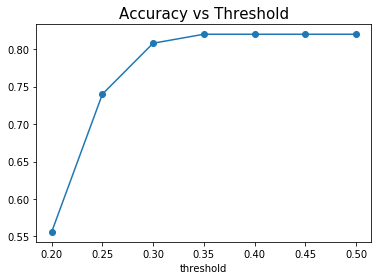

In [0]:
#Plot of accuracy for different decision thresholds
threshold = [0.2,0.25,0.3,0.35,0.4,0.45,0.5]
accuracy_list = []
for t in threshold:
    accuracy_list.append(accuracy(t))

#accuracy_list
plt.figure()
plt.plot(np.array(threshold), np.array(accuracy_list), "-o")
plt.title("Accuracy vs Threshold", size = 15)
plt.xlabel("threshold")

This Accuracy score is just a little better than the dummy classifier 0.817).
Logistic Regression seems not a good model for this problem. 
However, we can still base on the coefficient to interpret the effect of the features on the probability of conversion.
From the coefficient values, we see that Ad1 is still the most effective ad copy among 3 ad copies we have. This result is consistent with what we have observed

## Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from IPython.display import Image
from sklearn import tree

In [0]:
advertising_rules.head()

,Male,Conversion,ASIA (EX. NEAR EAST),BALTICS,C.W. OF IND. STATES,EASTERN EUROPE,LATIN AMER. & CARIB,NEAR EAST,NORTHERN AFRICA,NORTHERN AMERICA,OCEANIA,SUB-SAHARAN AFRICA,WESTERN EUROPE,ad1,ad2,ad3,lp1,lp2,lp3,lp4,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Age 25-34,Age 35-44,Age <= 24,Age > 44,High Income,Low Income,Middle Income
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0


In [0]:
feature_tree = advertising_rules[['Male','ad2','ad3','lp2','lp3','lp4',"Age 25-34","Age 35-44","Age <= 24", "Age > 44",
                                  "High Income", "Low Income", "Middle Income"]]
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(feature_tree, label)

In [0]:
decisiontree = DecisionTreeClassifier(random_state = 0, max_depth = 5, min_samples_leaf = 30)
model = decisiontree.fit(X_train_tree, y_train_tree)
dot_data = tree.export_graphviz(decisiontree, out_file = None, feature_names = feature_tree.keys())

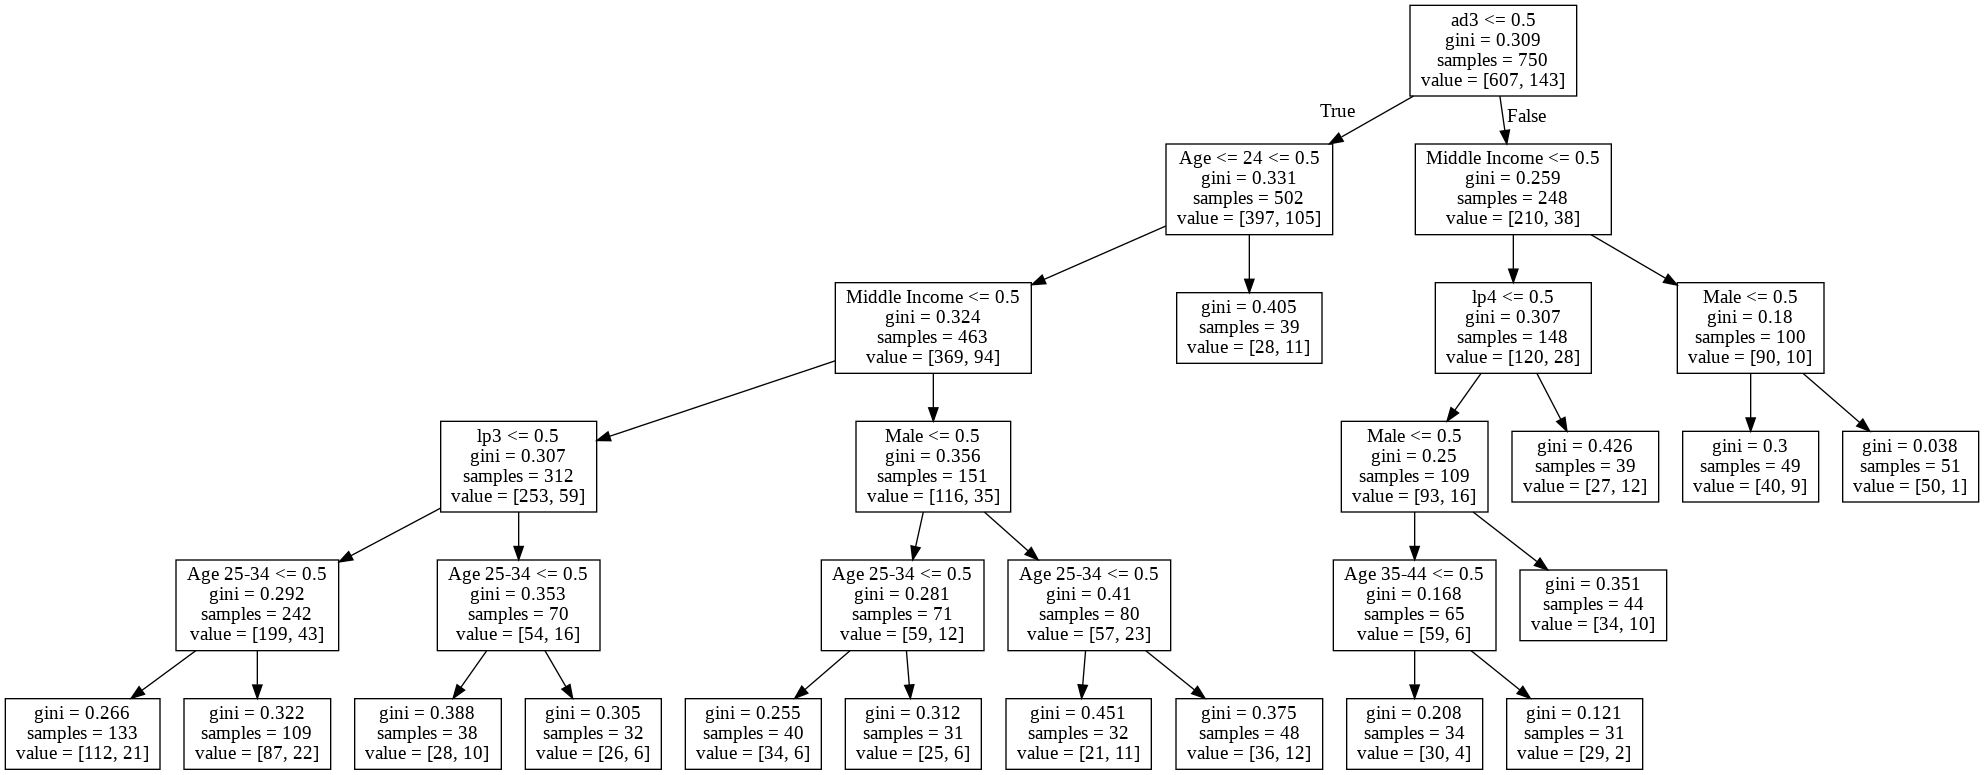

In [0]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [0]:
y_pred = model.predict(X_test_tree)

In [0]:
proba_tree = model.predict_proba(X_test_tree)[:,1]

In [0]:
def accuracy_tree(t):
    y_pred_2 = []
    for i in proba_tree:
        if i > t:
            y_pred_2.append(1)
        else:
            y_pred_2.append(0)
    return accuracy_score(y_test_tree, y_pred_2)

Text(0.5, 0, 'threshold')

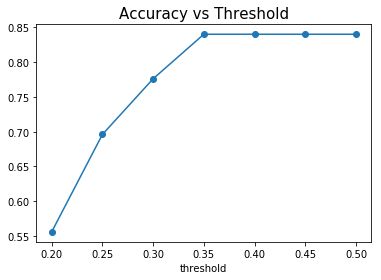

In [0]:
#Plot of accuracy for different decision thresholds
threshold_tree = [0.2,0.25,0.3,0.35,0.4,0.45,0.5]
accuracy_list_tree = []
for t in threshold_tree:
    accuracy_list_tree.append(accuracy_tree(t))

#accuracy_list
plt.figure()
plt.plot(np.array(threshold_tree), np.array(accuracy_list_tree), "-o")
plt.title("Accuracy vs Threshold", size = 15)
plt.xlabel("threshold")

Decision Tree yields the accuracy score of 84%, higher than logistic regression.

Decision Tree gives us some more interesting findings for our advertising optimization:
- Use Ad3 for Middle Income audience can increase conversion rate
- If we use Ad2 for other Low or High Income audience, we should not use lp4
- Use Ad1 and Ad2 for Age > 35, Low or High Income without lp3 can increase conversion rate.
